# Vizualizing Data

We are now exploring further our clean Age and Gender data through visualization to see whether there are some interesting insights that will be beneficial to the health sector to prevent further cases of HIV/AIDS and at the same time finding better means to assist those that are already affected. The approach is to use descriptive Stats, identify trends and do some group comparisons.

In [77]:
#Importing needed libraries
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns

#Reading the data
df_Gender = pd.read_csv('df_Gender_Cleaned.csv')
df_Age = pd.read_csv('df_Age_Cleaned.csv')
Age_Gender_df = pd.read_csv('Age_Gender_Joined.csv')

As a good way to kick start, lets look at the number of HIV diagnoses by age, across all races. 

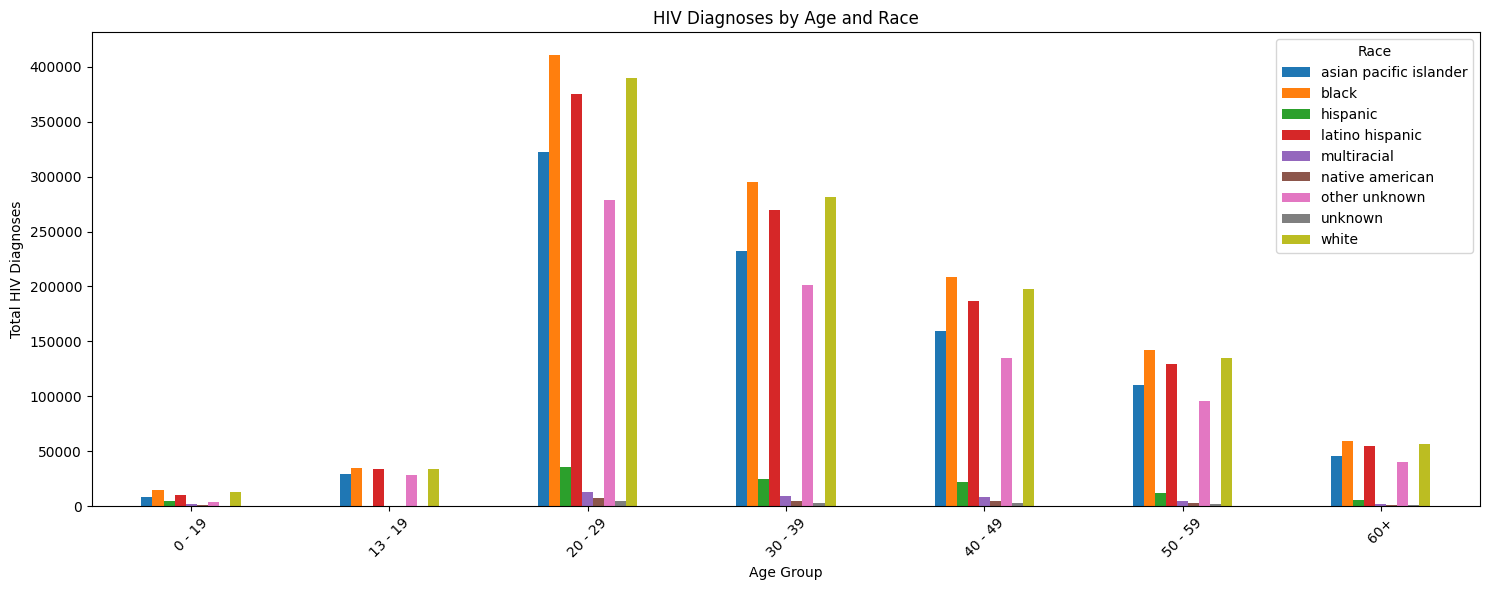

In [78]:
# Ensure the relevant columns exist and are in the correct format
Age_Gender_df['Age'] = Age_Gender_df['Age'].astype(str)
Age_Gender_df['Gender'] = Age_Gender_df['Gender'].astype(str)
Age_Gender_df['Total_HIV_Diagnoses_by_Age'] = pd.to_numeric(Age_Gender_df['Total_HIV_Diagnoses_by_Age'], errors='coerce')

# Excluding rows where AGE or GENDER is "All" regarding whether it's lower or upper case
Age_Gender_df = Age_Gender_df[(Age_Gender_df['Age'].str.upper() != 'ALL') & (Age_Gender_df['Gender'].str.upper() != 'ALL')]

# Group the data by AGE and GENDER
grouped = Age_Gender_df.groupby(['Age', 'Gender'])['Total_HIV_Diagnoses_by_Age'].sum().unstack()

# Plotting
grouped.plot(kind='bar', figsize=(15, 6))

plt.title('HIV Diagnoses by Age and Race')
plt.xlabel('Age Group')
plt.ylabel('Total HIV Diagnoses')
plt.legend(title='Race')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We notice that the highest number of HIV diagnoses affect the age group 20 to 29, followed by 30 to 39. Lets deepdive to see whether this has to do with the neighborhood they live in and their gender

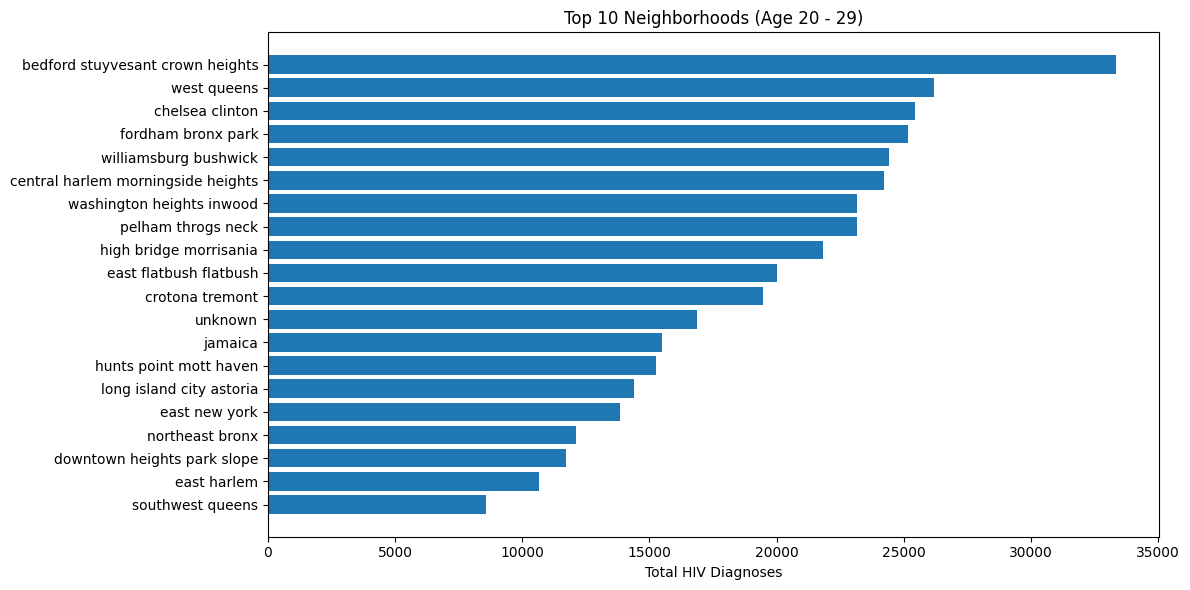

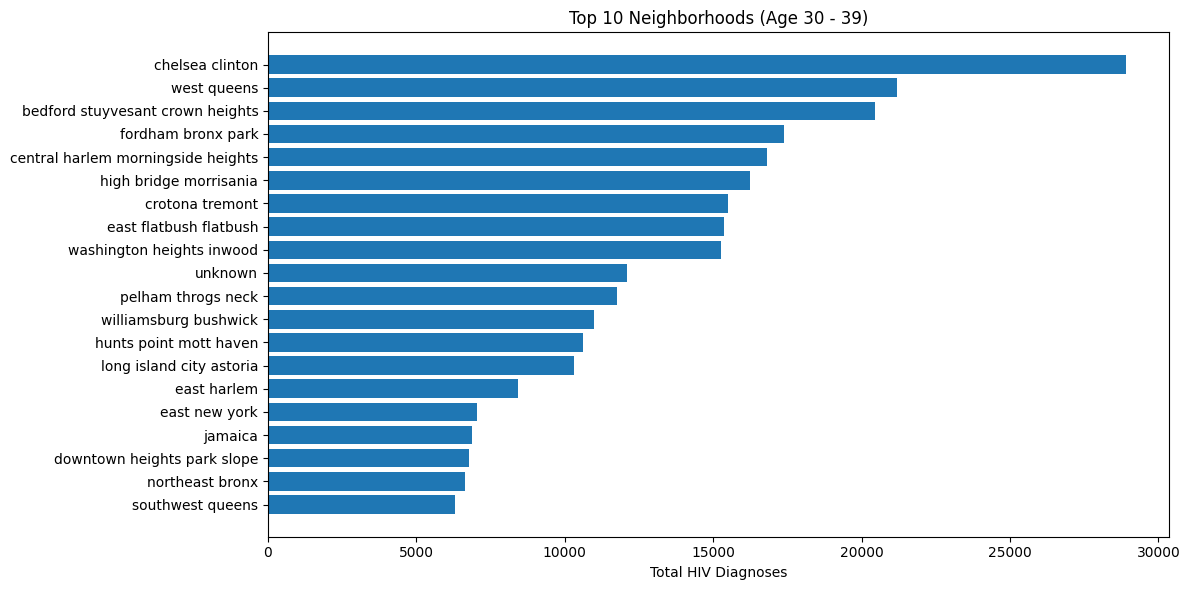

In [79]:
# Excluding row were value is "all", whether it's upper or lower case
Age_Gender_df = Age_Gender_df[~Age_Gender_df['Neighborhood'].str.lower().eq("all")]

# Filtering for Age Groups 20 - 29 and 30 - 39
df_Group_Age_filtered = Age_Gender_df[Age_Gender_df['Age'].isin(['20 - 29', '30 - 39'])]

# Converting HIV Diagnoses column to numeric
df_Group_Age_filtered = df_Group_Age_filtered.copy()
df_Group_Age_filtered['Total_HIV_Diagnoses_by_Age'] = pd.to_numeric(
    df_Group_Age_filtered['Total_HIV_Diagnoses_by_Age'], errors='coerce'
)

# Grouping by AGE and Neighborhood, then sum
grouped = df_Group_Age_filtered.groupby(['Age', 'Neighborhood'])['Total_HIV_Diagnoses_by_Age'].sum().reset_index()

# Getting the top 20 neighborhoods per age group with highest numbers of diaognoses
top_20_29 = grouped[grouped['Age'] == '20 - 29'].nlargest(20, 'Total_HIV_Diagnoses_by_Age')
top_30_39 = grouped[grouped['Age'] == '30 - 39'].nlargest(20, 'Total_HIV_Diagnoses_by_Age')

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_20_29['Neighborhood'], top_20_29['Total_HIV_Diagnoses_by_Age'])
plt.xlabel("Total HIV Diagnoses")
plt.title("Top 10 Neighborhoods (Age 20 - 29)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(top_30_39['Neighborhood'], top_30_39['Total_HIV_Diagnoses_by_Age'])
plt.xlabel("Total HIV Diagnoses")
plt.title("Top 10 Neighborhoods (Age 30 - 39)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Both age groups with highest number of HIV Diagnoses share the same neighborhoods; In the top 5, 10 and 20. Lets now look at the trends over the years in both HIV and AIDS diagnoses

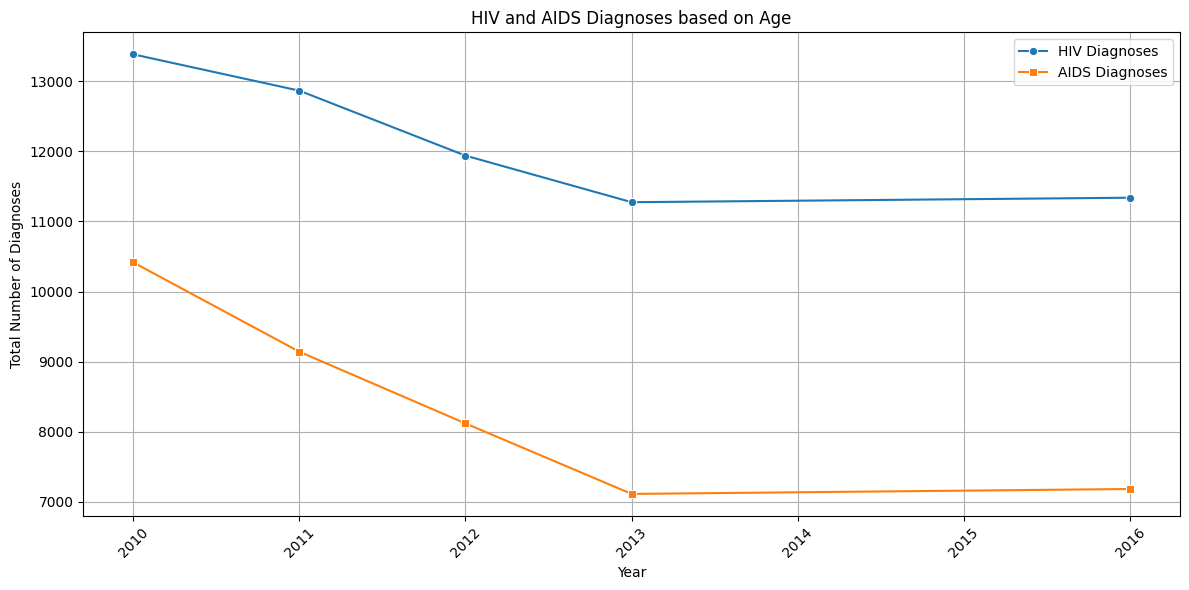

In [80]:
# Ensuring columns are numeric
df_Age['AGE TOTAL NUMBER OF HIV DIAGNOSES'] = pd.to_numeric(df_Age['AGE TOTAL NUMBER OF HIV DIAGNOSES'], errors='coerce')
df_Age['AGE TOTAL NUMBER OF AIDS DIAGNOSES'] = pd.to_numeric(df_Age['AGE TOTAL NUMBER OF AIDS DIAGNOSES'], errors='coerce')

# Excluding all neighborhoods marked as All
df_filtered = df_Age[df_Age['NEIGHBORHOOD'] != 'All']

# Grouping by YEAR and summing both HIV and AIDS diagnoses
diagnosis_trend_yearly = (
    df_filtered
    .groupby('YEAR')[['AGE TOTAL NUMBER OF HIV DIAGNOSES', 'AGE TOTAL NUMBER OF AIDS DIAGNOSES']]
    .sum()
    .reset_index()
)

# Creating a trends Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=diagnosis_trend_yearly, x='YEAR', y='AGE TOTAL NUMBER OF HIV DIAGNOSES', marker='o', label='HIV Diagnoses')
sns.lineplot(data=diagnosis_trend_yearly, x='YEAR', y='AGE TOTAL NUMBER OF AIDS DIAGNOSES', marker='s', label='AIDS Diagnoses')
plt.title('HIV and AIDS Diagnoses based on Age')
plt.xlabel('Year')
plt.ylabel('Total Number of Diagnoses')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Running analysis based on participants age. It's noticeable that AIDS diagnoses have gone remarkably down, with the year 2013 having the lowest numbers recorded, meanwhile HIV diagnoses still of a big concern even though numbers seems to have stabilized around 2013. 

Lets create a similar report, this time based on participnts gender and compare both results

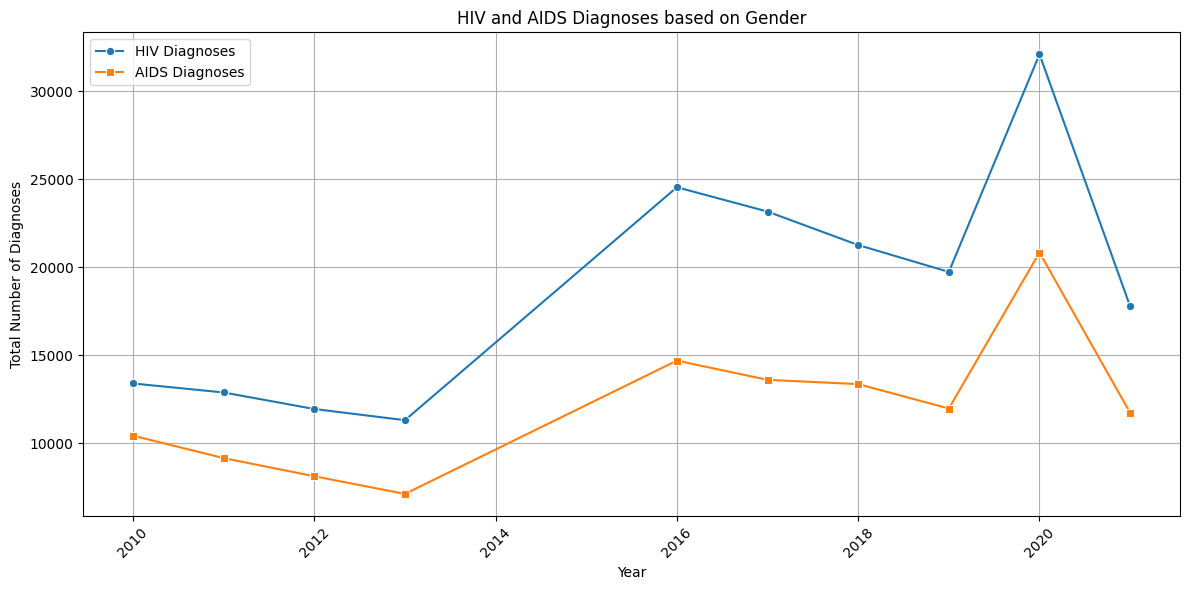

In [81]:
# Ensuring columns are numeric
df_Gender['GENDER TOTAL NUMBER OF HIV DIAGNOSES'] = pd.to_numeric(df_Gender['GENDER TOTAL NUMBER OF HIV DIAGNOSES'], errors='coerce')
df_Gender['GENDER TOTAL NUMBER OF AIDS DIAGNOSES'] = pd.to_numeric(df_Gender['GENDER TOTAL NUMBER OF AIDS DIAGNOSES'], errors='coerce')

# Excluding all neighborhoods marked as All
df_filtered = df_Gender[df_Gender['NEIGHBORHOOD'] != 'All']

# Grouping by YEAR and summing both HIV and AIDS diagnoses
diagnosis_trend_yearly = (
    df_filtered
    .groupby('YEAR')[['GENDER TOTAL NUMBER OF HIV DIAGNOSES', 'GENDER TOTAL NUMBER OF AIDS DIAGNOSES']]
    .sum()
    .reset_index()
)

# Creating a trends Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=diagnosis_trend_yearly, x='YEAR', y='GENDER TOTAL NUMBER OF HIV DIAGNOSES', marker='o', label='HIV Diagnoses')
sns.lineplot(data=diagnosis_trend_yearly, x='YEAR', y='GENDER TOTAL NUMBER OF AIDS DIAGNOSES', marker='s', label='AIDS Diagnoses')
plt.title('HIV and AIDS Diagnoses based on Gender')
plt.xlabel('Year')
plt.ylabel('Total Number of Diagnoses')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Analysis based on participants gender, reveal also reveal a similar story with the year 2013 having the lowest number of cases recorded. The trend went shooting up in 2016 and reached its highest peak in 2020 before start declining again. 

This leads me to run further analysis comparing HIV & AIDS diagnoses in different genders in order to understand which gender drives the highest numbers.

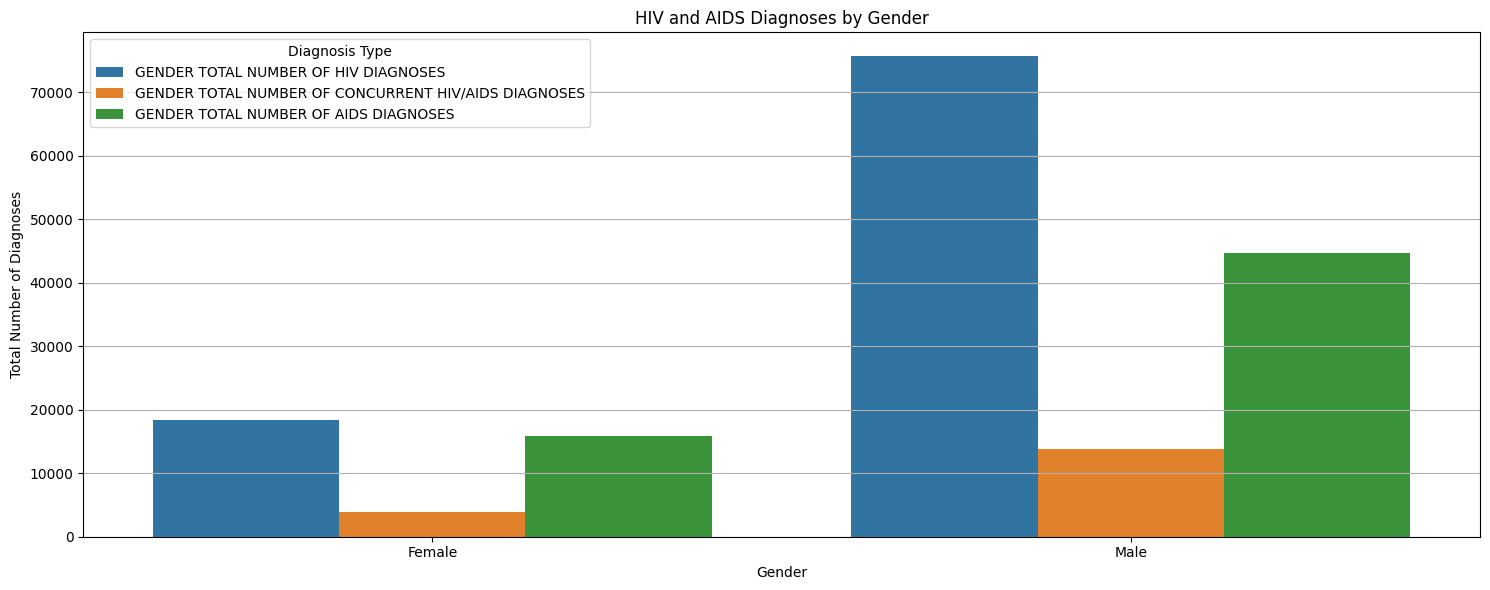

In [82]:
# Converting relevant columns to numeric
cols_to_convert = [
    'GENDER TOTAL NUMBER OF HIV DIAGNOSES',
    'GENDER TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
    'GENDER TOTAL NUMBER OF AIDS DIAGNOSES'
]
df_Gender[cols_to_convert] = df_Gender[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Excluding rows where SEX is 'All' whether upper or lower case
gender_strict_filtered = df_Gender[df_Gender['SEX'].str.strip().str.lower() != 'all']

# Grouping by SEX and then sum relevant columns
gender_summary_strict = (
    gender_strict_filtered
    .groupby('SEX')[cols_to_convert]
    .sum()
    .reset_index()
)

# Reshaping the dataframe before plotting
gender_summary_reshape = gender_summary_strict.melt(
    id_vars='SEX',
    value_vars=cols_to_convert,
    var_name='Diagnosis Type',
    value_name='Total Diagnoses'
)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(data=gender_summary_reshape, x='SEX', y='Total Diagnoses', hue='Diagnosis Type')
plt.title('HIV and AIDS Diagnoses by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Number of Diagnoses')
plt.xticks(rotation=0)
plt.legend(title='Diagnosis Type')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()